<a href="https://colab.research.google.com/github/tamojeetroychowdhury/Krittika-Convener/blob/main/Gaia_Tucanae_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 KB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.7 MB/s eta 0:00:00


In [3]:
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#M3
query = '''SELECT g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.pm, DISTANCE(
POINT(54.813, 24.377),
POINT(g.ra, g.dec)) AS ang_sep
FROM gaiadr3.gaia_source AS g
WHERE 1 = CONTAINS(
POINT(54.813, 24.377),
CIRCLE(ra, dec, 5))
AND g.parallax BETWEEN 0 and 0.33
AND g.ruwe < 1.4
AND g.phot_bp_mean_mag - g.phot_rp_mean_mag < 1.6
AND g.phot_bp_mean_mag < 20.3
ORDER BY ang_sep ASC'''

job = Gaia.launch_job_async(query)
r3 = job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [11]:
#47 Tuc
query = '''SELECT g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.pmra, g.pmdec, g.pm, DISTANCE(
POINT(6.024, -72.081),
POINT(g.ra, g.dec)) AS ang_sep
FROM gaiadr3.gaia_source AS g
WHERE 1 = CONTAINS(
POINT(6.024, -72.081),
CIRCLE(ra, dec, 5))
AND g.pmra is not null
AND g.pmdec is not null
AND g.parallax BETWEEN 0 and 0.33
AND g.ruwe < 1.4
AND g.phot_bp_mean_mag - g.phot_rp_mean_mag < 1.6
AND g.phot_bp_mean_mag < 20.3'''

job = Gaia.launch_job_async(query)
r4 = job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
#M13
query = '''SELECT g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.phot_bp_mean_flux_error as bpe, g.phot_rp_mean_flux_error as rpe, g.pmra, g.pmdec,
g.pm, DISTANCE(
POINT(250.422, 36.46),
POINT(g.ra, g.dec)) AS ang_sep
FROM gaiadr3.gaia_source AS g
WHERE 1 = CONTAINS(
POINT(250.422, 36.46),
CIRCLE(ra, dec, 5))
AND g.phot_bp_mean_flux_error is not null
AND g.phot_rp_mean_flux_error is not null
AND g.pmra is not null
AND g.pmdec is not null
AND g.parallax BETWEEN 0 and 0.33
AND g.ruwe < 1.4
AND g.phot_bp_mean_mag - g.phot_rp_mean_mag < 1.6
AND g.phot_bp_mean_mag < 20.3
ORDER BY ang_sep ASC'''

job = Gaia.launch_job_async(query)
r5 = job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [13]:
#M4
query = '''SELECT g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.pmra, g.pmdec, g.pm
FROM gaiadr3.gaia_source AS g
WHERE 1 = CONTAINS(
POINT(245.9, -26.526),
CIRCLE(ra, dec, 5))
AND g.pmra is not null
AND g.pmdec is not null
AND g.parallax BETWEEN 0 and 0.33
AND g.ruwe < 1.4
AND g.phot_bp_mean_mag - g.phot_rp_mean_mag < 1.6
AND g.phot_bp_mean_mag < 20.3'''

job = Gaia.launch_job_async(query)
r5 = job.get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [12]:
len(r4)

726883

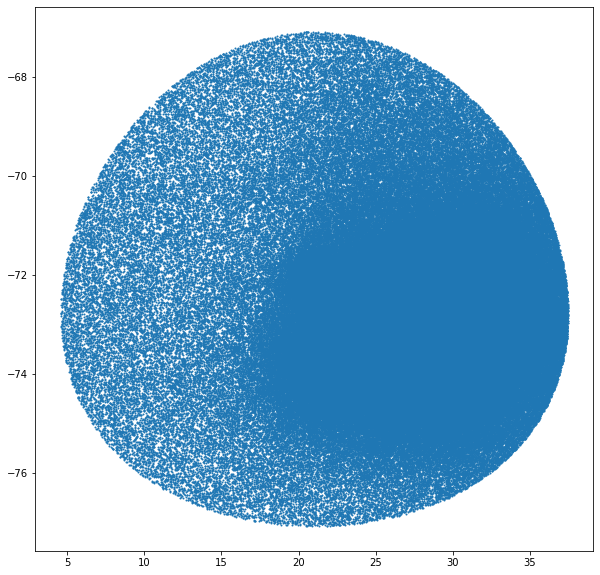

In [120]:
plt.figure(figsize = (10,10))
plt.scatter((r4['ra']+15)%360, r4['dec'], s=1)
plt.show()

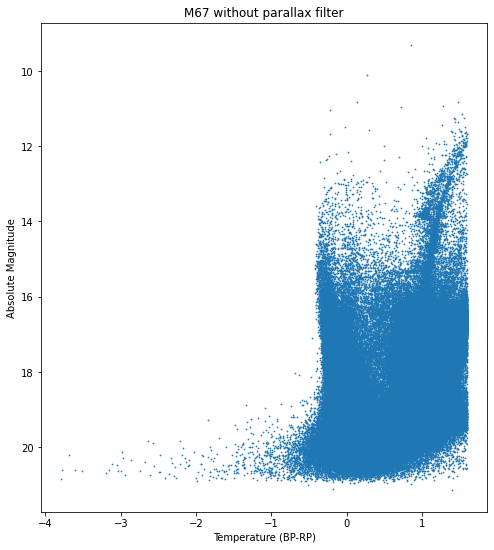

In [13]:
appmags = r4['phot_g_mean_mag']
dist = 1000*np.reciprocal(r4['parallax'])
#plt.figure(figsize=(7,7))





abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r4['phot_bp_mean_mag'] - r4['phot_rp_mean_mag']


plt.figure(figsize=(8,9))
plt.scatter(g,appmags,s=0.5)
#plt.ylim(-10,20)
#plt.xlim(1000,30000)
#plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('M67 without parallax filter')
plt.show()

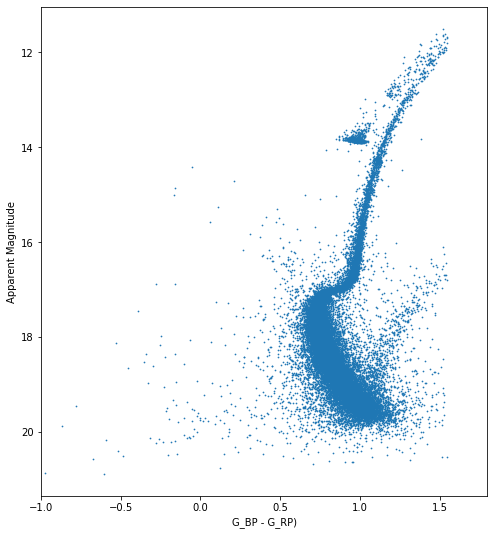

In [45]:
mask = (r4['ra'] - 6.024)**2 + (r4['dec'] + 72.081)**2 <= (43/60)**2
r6 = r4[mask]

#mask = (r6['ra'] - 250.422)**2 + (r6['dec'] - 36.46)**2 >= 1/400
#r6 = r6[mask]

appmags = r6['phot_g_mean_mag']
dist = 1000*np.reciprocal(r6['parallax'])
#plt.figure(figsize=(7,7))





abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r6['phot_bp_mean_mag'] - r6['phot_rp_mean_mag'] - 0.05


plt.figure(figsize=(8,9))
plt.scatter(g,appmags,s=0.5)
#plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,1.8)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('G_BP - G_RP)')
plt.ylabel('Apparent Magnitude')
#plt.title('M67 without parallax filter')
plt.show()

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
f = open('gdrive/My Drive/tidal2.txt')

l = f.readlines()

b = []
v = []
r = []

for i in l:
    s = i.split()
    b.append(float(s[-2]))
    v.append(float(s[-3]))
    r.append(float(s[-1]))

b = np.array(b)
r = np.array(r)
v = np.array(v)

v+=13.2

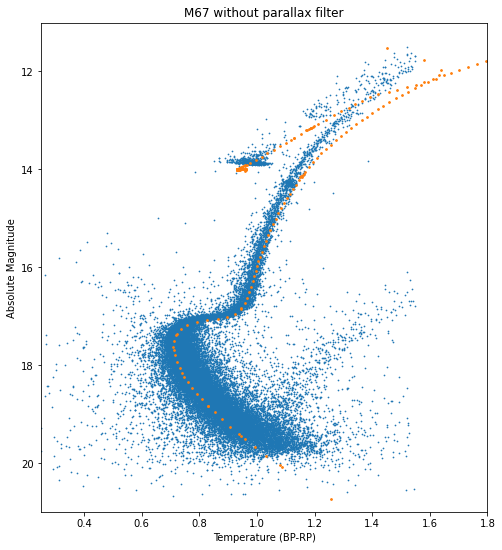

In [46]:
plt.figure(figsize=(8,9))
plt.scatter(g,appmags,s=0.5)
plt.ylim(11,21)
#plt.xlim(1000,30000)
plt.xlim(0.25,1.8)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('M67 without parallax filter')


plt.scatter(b-r, v, s=3)
plt.show()

In [57]:
v

array([30.403, 30.082, 29.055, 28.799, 27.562, 26.707, 26.129, 25.35 ,
       24.677, 24.175, 23.761, 23.313, 22.797, 22.203, 21.495, 20.743,
       20.075, 20.045, 19.85 , 19.673, 19.51 , 19.453, 19.415, 19.257,
       19.107, 18.968, 18.839, 18.834, 18.703, 18.584, 18.464, 18.353,
       18.238, 18.164, 18.063, 17.928, 17.791, 17.693, 17.625, 17.507,
       17.379, 17.357, 17.272, 17.184, 17.119, 17.087, 17.059, 17.016,
       16.949, 16.856, 16.841, 16.732, 16.632, 16.508, 16.41 , 16.282,
       16.178, 16.08 , 15.982, 15.881, 15.786, 15.688, 15.569, 15.472,
       15.35 , 15.233, 15.119, 15.007, 14.902, 14.797, 14.693, 14.593,
       14.496, 14.404, 14.315, 14.227, 14.149, 14.089, 14.11 , 14.155,
       14.141, 14.048, 13.952, 13.856, 13.762, 13.669, 13.582, 13.493,
       13.405, 13.319, 13.237, 13.155, 13.075, 12.996, 12.921, 12.845,
       12.771, 12.702, 12.63 , 12.547, 12.483, 12.417, 12.34 , 12.279,
       12.219, 12.149, 12.082, 12.028, 11.967, 11.907, 11.849, 11.793,
      

In [58]:
np.where(v == 11.907)

(array([109]),)

<function matplotlib.pyplot.show(close=None, block=None)>

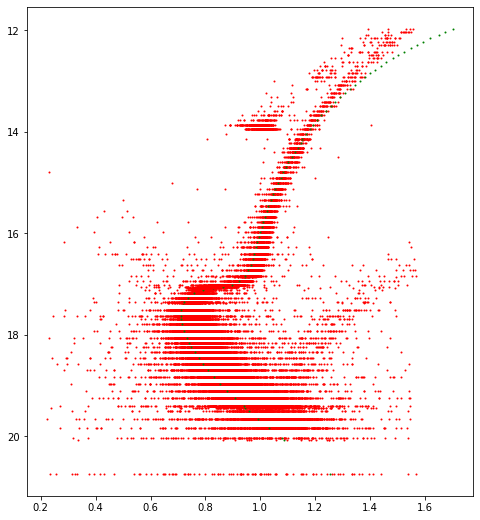

In [59]:
br = b-r

errm = []
sigma2 = []
mags = []
brnew = []

plt.figure(figsize = (8,9))



for i in range(15,109):
  mid = (v[i]+v[i+1])/2
  width = (v[i] - v[i+1])/2

  mask = np.abs(r6['phot_g_mean_mag'] - mid) <= width
  r7 = r6[mask]

  mask = r7['phot_bp_mean_mag'] - r7['phot_rp_mean_mag'] > 0.25
  r7 = r7[mask]

  if len(r7) not in [0,1]:
    br1 = r7['phot_bp_mean_mag'] - r7['phot_rp_mean_mag'] - 0.03
    #w = 2*(br1 - v[i])/(r7['bpe']+r7['rpe'])
    #errm.append(np.mean(r7['bpe']+r7['rpe'])/2)
    sigma2.append(2*np.std(br1 - br[i]))
    plt.scatter(br1, [v[i]]*len(br1), color='r', s=1)
    plt.scatter(br[i], v[i], color = 'g', s=1)
    mags.append(v[i])
    brnew.append(br[i])

plt.gca().invert_yaxis()
plt.show
#plt.scatter(mags, sigma2)
#plt.show()

In [50]:
def find_nearest(array, value):
  array = np.asarray(array)
  idx = (np.abs(array - value)).argmin()
  return idx

In [60]:
r8 = []

for i in r4:
  iso = find_nearest(mags, i['phot_g_mean_mag'])
  br1 = i['phot_bp_mean_mag'] - i['phot_rp_mean_mag'] - 0.04
  #w = 2*(br1 - br[iso])/(i['bpe']+i['rpe'])
  if np.abs(br1 - brnew[iso]) <= sigma2[iso]:
    r8.append([x for x in i])

In [65]:
len(r8[0])

10

In [62]:
import astropy

In [66]:
r8 = astropy.table.Table([i.astype('float64') for i in np.array(r8).T], names = ['ra', 'dec', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'pmra', 'pmdec', 'pm', 'ang_sep'])

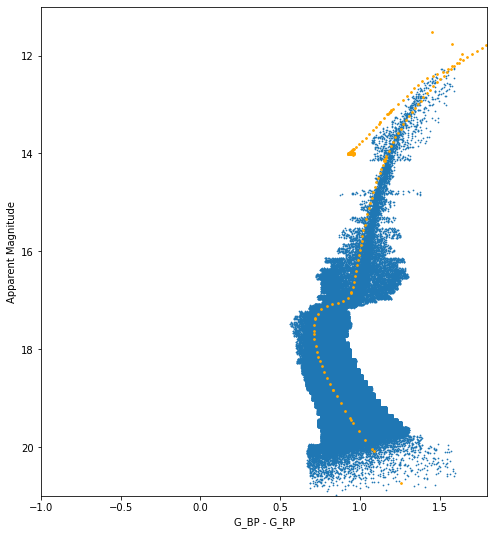

In [67]:
appmags = r8['phot_g_mean_mag']
dist = 1000*np.reciprocal(r8['parallax'])
#plt.figure(figsize=(7,7))





abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r8['phot_bp_mean_mag'] - r8['phot_rp_mean_mag']


plt.figure(figsize=(8,9))
plt.scatter(g,appmags,s=0.5)

plt.scatter(b-r, v, s=3, color = 'orange')
plt.ylim(11,21)
#plt.xlim(1000,30000)
plt.xlim(-1,1.8)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('G_BP - G_RP')
plt.ylabel('Apparent Magnitude')
#plt.title('M67 without parallax filter')
plt.show()

In [68]:
len(r6)

34680

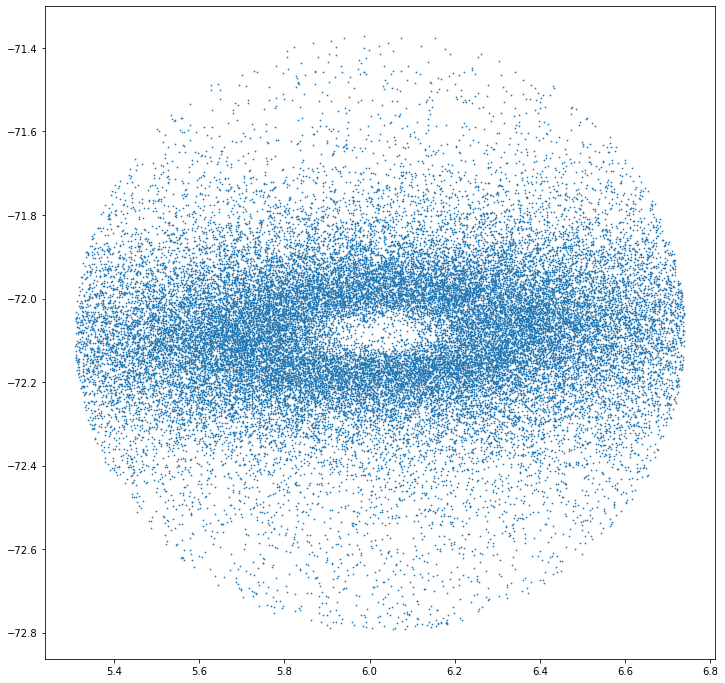

In [69]:
plt.figure(figsize=(12,12))
#plt.scatter(r5['ra'], r5['dec'], s=0.5)
plt.scatter(r6['ra'], r6['dec'], s=0.5)
#plt.scatter(r8['ra'], r8['dec'], s=0.5)
plt.show()

In [73]:
print(np.mean(r6['pmdec']), np.std(r6['pmdec']))

-2.496210544590167 0.6645047637899326


In [78]:
mask = np.abs(r8['pmra'] - np.mean(r6['pmra'])) < np.std(r6['pmra'])
r9 = r8[mask]

mask = np.abs(r9['pmdec'] - np.mean(r6['pmdec'])) < np.std(r6['pmdec'])
r9 = r9[mask]

In [79]:
len(r9)

35121

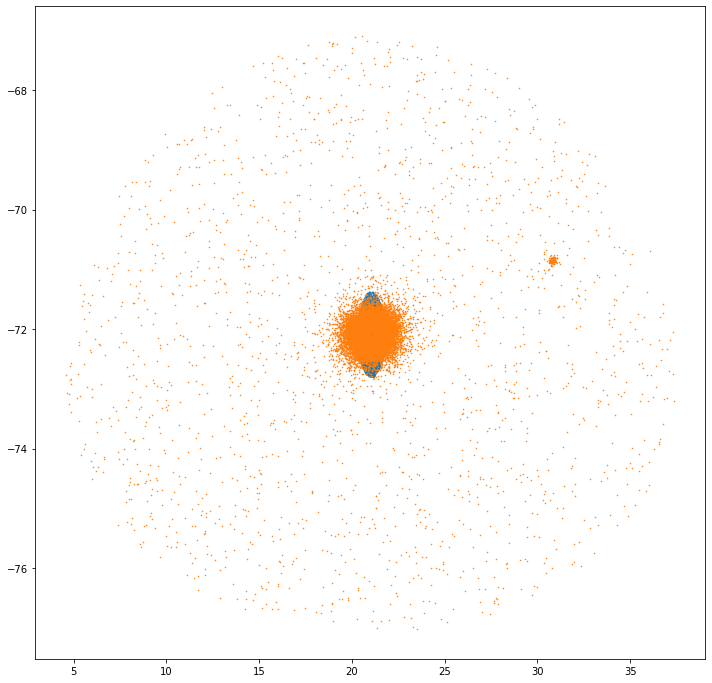

In [119]:
plt.figure(figsize=(12,12))
plt.scatter((r6['ra']+15)%360, r6['dec'], s=0.5)
plt.scatter((r9['ra']+15)%360, r9['dec'], s=0.3)
plt.show()

[]

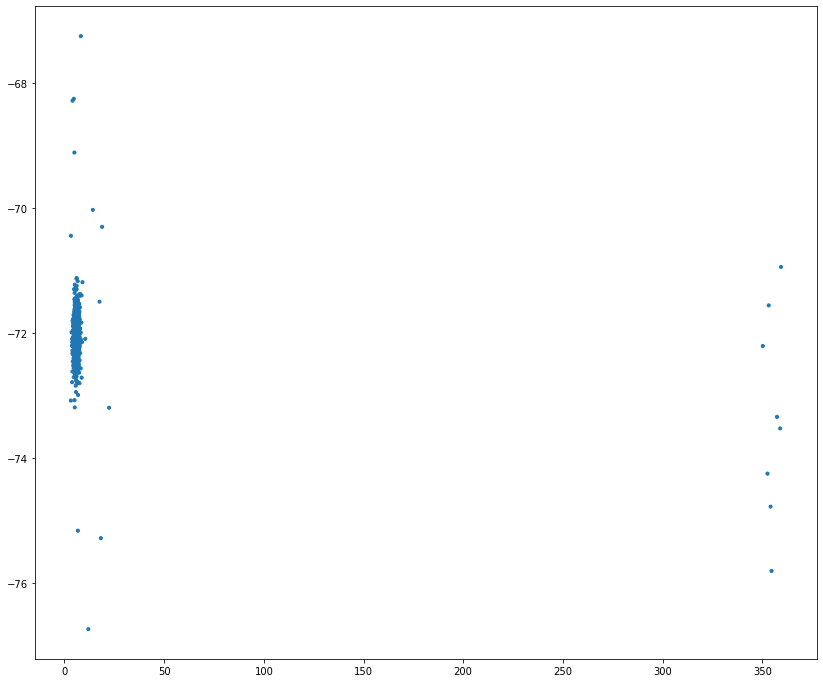

In [81]:
k = 1
probs = []

for i in r9:
  g = i['phot_bp_mean_mag'] - i['phot_rp_mean_mag'] - 0.05
  iso = find_nearest(mags, i['phot_g_mean_mag'])

  probs.append(np.exp(-((i['pmra'] - np.mean(r6['pmra']))**2)/k/np.std(r6['pmra'])**2  -  ((i['pmdec'] - np.mean(r6['pmdec']))**2)/k/np.std(r6['pmdec'])**2 - (g-brnew[iso])**2*4/sigma2[iso]**2))


probs = np.array(probs)
indices = np.where(np.array(probs) > 0.9)
r10 = r9[indices]
colours = np.array(probs[indices])*1000
plt.figure(figsize = (14,12))
plt.scatter(r10['ra'], r10['dec'], s=colours/100)
#plt.colorbar()
plt.plot()

[]

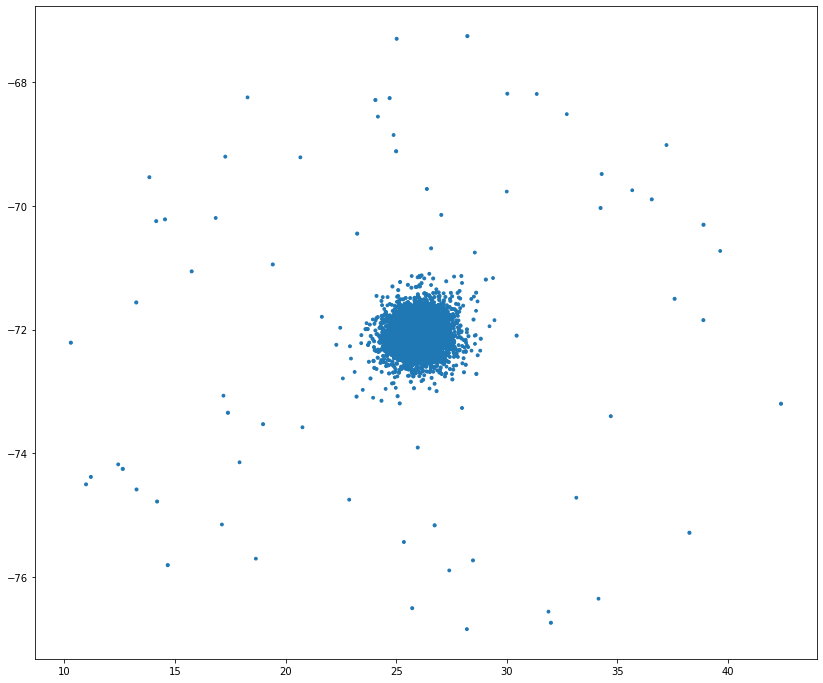

In [100]:
probs = np.array(probs)
indices = np.where(np.array(probs) > 0.75)
r10 = r9[indices]
colours = np.array(probs[indices])*1000
plt.figure(figsize = (14,12))
plt.scatter((r10['ra']+20)%360, r10['dec'], s=colours/100)
#plt.colorbar()
plt.plot()

In [ ]:
r5[0]['ra'] in r10['ra']

False

In [134]:
from math import *

indata = []
outprobs = []

for i in range(len(r8)):
  p = r8[i]
  theta = atan2(p['dec'] - 36.46, p['ra'] - 250.422)
  if theta == 0:
    theta = 0.00001
  dlon = (p['ra']+40)%360 - (6.024+40) 
  dlat = p['dec'] + 72.081
  lat1, lat2 = p['dec'], -72.081
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  r = 2 * asin(sqrt(a))
  #r = np.sqrt((p['dec'] + 72.081)**2 + (p['ra'] - 6.024)**2)
  iso = find_nearest(mags, p['phot_g_mean_mag'])
  indata.append([p['ra'], p['dec'], p['pmra'], p['pmdec'], r, theta, p['phot_bp_mean_mag']-p['phot_rp_mean_mag']-0.05-brnew[iso]])

  if p['ra'] in r10['ra']:
    outprobs.append(1)

  else:
    outprobs.append(0)

In [135]:
np.count_nonzero(outprobs)

9485

In [137]:
indata = np.array(indata)

In [ ]:
print(np.std(r6['ra']), np.std(r6['dec']), np.std(r6['pmra']), np.std(r6['pmdec']))

0.09745423469225153 0.08156318748091289 0.7095448770099843 1.0183557244217798


In [142]:

clra = np.mean(r6['pmra'])
cldec = np.mean(r6['pmdec'])

from scipy.optimize import curve_fit

def f(x, k1, k4, k6, k8, k9, k10, k11, a, b, g, tex, k7):

  e1 = x[4]**2/k1 + (x[2] - clra)**2/k4 + (x[3] - cldec)**2/k6# + x[6]**2/k7
  e2 = (x[2] - k8)**2/k9 + (x[3] - k10)**2/k11

  l1 = e1 * np.log( a + b*np.cos(x[5]-tex)**2 * r**g)
  l2 = k7*e2 

  #print(l1, l2)
  return (np.exp(-l1)) / (np.exp(-l1) + np.exp(-l2))# * (1 + np.cos(x[5] - tmw)))


popt, pcov = curve_fit(f, indata.T, outprobs, 
                       p0 = [1, np.std(r6['pmra']), np.std(r6['pmdec']), 0, 3, 0, 3, 1, 1, -1.5, 1.6, 0.5],
                       bounds = ([0.01,0.01,0.01,-10,0.1,-10,0.1,0.1,0.1,-3,0.0, 0.01],
                                 [100.00,4.00,4.00,+10,10.00,+10,10.00,np.inf,np.inf,-0.2,np.pi, np.inf]))

# bounds = ([0.01,0.01,0.01,0.01,-5,0.01,-5,0.01,0.01,0.01,-3,0.01,0.01],
#           [4,4,4,4,5,4,5,4,np.inf,np.inf,-0.2,np.pi,np.inf]))

<ipython-input-142-dd1707143386>:15: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(-l1)) / (np.exp(-l1) + np.exp(-l2))# * (1 + np.cos(x[5] - tmw)))


In [143]:
popt

array([ 9.98880791e+01,  5.27298590e-02,  1.64059811e-02, -3.92219274e+00,
        6.87497752e+00, -2.18102919e+00,  5.36597939e+00,  1.45529819e+00,
        5.31002584e+03, -2.00019810e-01,  1.98916202e+00,  1.27689577e-01])

In [145]:
[pcov[i][i] for i in range(11)]

[6668.1579043047905,
 4.939951756774152e-05,
 4.914689086534845e-06,
 2.6894169842213915,
 86348.74972802274,
 1262.8411607968371,
 141839.34801029478,
 0.005324445749365649,
 4.6377213963304444e-09,
 0.06962900180983113,
 1.4643696370933836e-08]

In [ ]:
def f2(x, k1, k2, k4, k8, k9, k10, k11, a, b, g, k7):

  return f(x, k1, k2, k4, 1.90820425e-01, k8, k9, k10, k11, a, b, g, 2.36808558e+00, k7)

In [ ]:
popt2, pcov2 = curve_fit(f2, indata.T, outprobs, 
                       p0 = [np.std(r6['ra']), np.std(r6['dec']), np.std(r6['pmra']), 0, 3, 0, 3, 1, 1, -1.5, 0.5],
                       bounds = ([0.01,0.01,0.1,-5,0.1,-5,0.1,0.1,0.1,-3, 0.01],
                                 [1.00,1.00,4.00,+5,4.00,+5,4.00,np.inf,np.inf,-0.2, np.inf]))

In [ ]:
popt2

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e-01,  4.99999998e+00,
        3.99753229e+00, -5.00000000e+00,  7.26920694e-01,  2.81229500e+00,
        9.50845498e+01, -9.42911213e-01,  4.54341947e-02])

In [ ]:
[pcov2[i][i] for i in range(11)]

[0.11620425303173673,
 0.12975759171854231,
 0.0005266473058021944,
 25195.562570749633,
 1937578039517.3743,
 9898.904455101389,
 64069790835.73382,
 1.0407927804792263,
 1480108121870400.8,
 53935080716.70062,
 250289202.2413875]

In [ ]:
def f3(x, k8, k9, k10, k11, a, b, g, k7):

  return f(x, 1, 1, 0.1, 1.90820425e-01, k8, k9, k10, k11, a, b, g, 2.36808558e+00, k7)

In [ ]:
popt3, pcov3 = curve_fit(f3, indata.T, outprobs, 
                       p0 = [0, 3, 0, 3, 1, 1, -1.5, 0.5],
                       bounds = ([-5,0.1,-5,0.1,0.1,0.1,-3, 0.01],
                                 [+5,4.00,+5,4.00,np.inf,np.inf,-0.2, np.inf]))

In [ ]:
popt3

array([ 4.99999897,  3.99768524, -4.99999997,  0.72690599,  2.81164384,
       11.45312113, -1.38073656,  0.04543426])

In [ ]:
[pcov3[i][i] for i in range(8)]

[295.1659089084555,
 1660603312228.6206,
 110.97664979166746,
 54904220812.089806,
 0.06357665675140535,
 10100755376254.156,
 654010628927.5844,
 214494284.00820354]

In [ ]:
def f4(x, k8, k9, k10, k11, b, g, k7):

  return f(x, 1, 1, 0.1, 1.90820425e-01, k8, k9, k10, k11, 2.81164384, b, g, 2.36808558e+00, k7)

In [ ]:
popt4, pcov4 = curve_fit(f4, indata.T, outprobs, 
                       p0 = [0, 3, 0, 3, 1, -1.5, 0.5],
                       bounds = ([-10,0.1,-10,0.1,0.1,-3, 0.01],
                                 [+10,10.00,+10,4.00,np.inf,-0.2, np.inf]))

In [ ]:
popt4

array([ 8.68728527e+00,  9.99945813e+00, -9.99993616e+00,  5.61065798e-01,
        1.07099541e+01, -1.56341655e+00,  1.00002776e-02])

In [ ]:
[pcov[i][i] for i in range(13)]

[132.38136221723738,
 131.35902644877615,
 0.136487909620625,
 0.37893483311849274,
 981349.8033473252,
 30265849371613.02,
 2196.9502506273107,
 20616558329.140396,
 72.9935291131756,
 9950396819562.166,
 72585729109.36235,
 0.023867191931519715,
 438254994.7046012]

In [146]:
colours = np.array([f(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11]) for i in indata])

In [ ]:
colours2 = np.array([f2(i, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5], popt2[6], popt2[7], popt2[8], popt2[9], popt2[10]) for i in indata])

In [ ]:
colours2 = np.array([f3(i, popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5], popt3[6], popt3[7]) for i in indata])

In [ ]:
colours2 = np.array([f4(i, popt4[0], popt4[1], popt4[2], popt4[3], popt4[4], popt4[5], popt4[6]) for i in indata])

In [ ]:
w, e, r = np.std(r6['ra']), np.std(r6['dec']), np.std(r6['pmra'])
q, y, u, o = np.mean(r8['pmra']), np.std(r8['pmra']), np.mean(r8['pmdec']), np.std(r8['pmdec'])

colours = np.array([f2(i, w, e, r, q, y, u, o, popt2[7], popt2[8], popt2[9], popt2[10]) for i in indata])

In [ ]:
len(colours)

In [ ]:
colours[np.where(colours>0.002)] = 0.0015

In [ ]:
np.mean(r6['pmdec'])

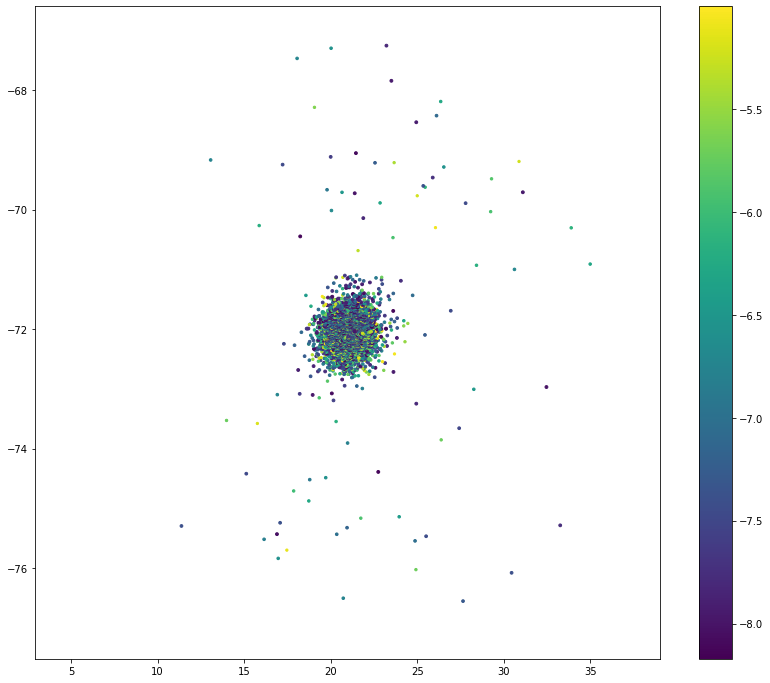

In [151]:
h = 0.5

plt.figure(figsize = (14,12))

plt.scatter((r9['ra']+15)%360, r9['dec'], s=1,color = 'white')
plt.scatter((indata[np.where(colours > h),0]+15)%360, indata[np.where(colours > h),1], c = -(10*colours[np.where(colours > h)]), s=10*colours[np.where(colours > h)])
#plt.xlim(2,40)
#plt.ylim(-77,-67)
plt.colorbar()
plt.show()


In [9]:
!pip install gala

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 41.3 MB/s eta 0:00:00


In [15]:
import astropy.units as u
c = SkyCoord(ra=6.024*u.deg, dec=-72.081*u.deg, distance = 4.45*u.kpc, pm_ra_cosdec=np.mean(r6['pmra'])*u.mas/u.yr, pm_dec=np.mean(r6['pmdec'])*u.mas/u.yr, radial_velocity=0*u.km/u.s)

In [16]:
import gala.coordinates as gc
gc.reflex_correct(c)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (6.024, -72.081, 4.45)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-1.28153954, 4.67052559, -141.12017459)>